<a href="https://colab.research.google.com/github/Alisha-Khan-Mridula/Graph-Coloring-Ordering-Prediction-via-Graph-Neural-Network-GNN-/blob/main/Simple_visualization_of_Cora_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%pip install torch torchvision torchaudio


In [6]:
%pip install torch-geometric torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-$(torch --version | awk -F '[: ]+' '{print $3}')+cu$(nvidia-smi --query-gpu=driver_version --format=csv,noheader | awk -F '.' '{print $1$2}')/torch_stable.html


/bin/bash: line 1: torch: command not found
/bin/bash: line 1: nvidia-smi: command not found
Looking in links: https://data.pyg.org/whl/torch-+cu/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 708.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.1 MB/s eta 0:00:00
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=537340 sha256=59221d314c38074977c5f27878dbbc5a60e003a43ca9fd80cdf3137b2377d85d
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c836356856905324804

In [27]:
#Finding the number of classes, nodes, edges and features
import torch
from torch_geometric.datasets import Planetoid
name_dataset = 'Cora'   #Dataset name
dataset = Planetoid(root= '/temp/' + name_dataset, name = name_dataset)

print(f"Number of classes in {name_dataset}: " , dataset.num_classes)
class_labels = torch.unique(dataset[0].y)
print(f"Class labels in {name_dataset}: ", class_labels)
print(f"Number of nodes per graph in {name_dataset}: ", dataset[0].num_nodes)
print(f"Number of edges per node in {name_dataset}: ", dataset[0].num_edges)
print(f"Number of features per node in {name_dataset}: ", dataset.num_node_features)




Number of classes in Cora:  7
Class labels in Cora:  tensor([0, 1, 2, 3, 4, 5, 6])
Number of nodes per graph in Cora:  2708
Number of edges per node in Cora:  10556
Number of features per node in Cora:  1433


In [23]:
# Finding graph is directed or undirected
data = dataset[0]
print(f'Is undirected: {data.is_undirected()}')

Is undirected: True


In [29]:
# Finding the neighbors of node 40
import numpy as np
edge_index = data.edge_index.numpy()
edge_index
print(edge_index.shape)
edge_example = edge_index[:, np.where(edge_index[0]==40)[0]]
edge_example

(2, 10556)


array([[  40,   40,   40],
       [ 507,  866, 1364]])

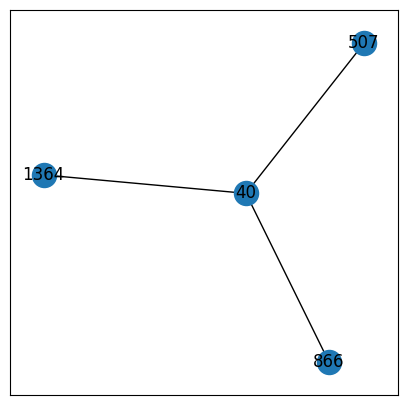

In [26]:
# Plotting the neighbors of node 40, where are 507, 1364 and 866
import matplotlib.pyplot as plt
import networkx as nx
node_example = np.unique(edge_example.flatten())
plt.figure(figsize=(5, 5))
G = nx.Graph()
G.add_nodes_from(node_example)
G.add_edges_from(list(zip(edge_example[0], edge_example[1])))
nx.draw_networkx(G, with_labels=True)

In [28]:
# Finding whether there is any self-loops or not
self_loops = edge_index[0] == edge_index[1]

# Print whether self-loops exist
if self_loops.any():
    print(f"There are self-loops in the {name_dataset} dataset.")
else:
    print(f"There are no self-loops in the {name_dataset} dataset.")

There are no self-loops in the Cora dataset.


https://medium.com/@koki_noda/ultimate-guide-to-graph-neural-networks-1-cora-dataset-37338c04fe6f#:~:text=Edges,is%20unique%20to%20graph%20data.&text=The%20number%20of%20edges%20seems%20to%20be%2010556. [Source
]